In [ ]:
pip install fix-yahoo-finance==0.1.30

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import yfinance as yf

In [7]:
# import package
import pandas_datareader.data as web

# set start and end dates 
start = datetime.datetime(2016, 1, 1) 
end = datetime.datetime(2019, 1, 1) 

# extract the closing price data
google = yf.Ticker('GOOG')
goog = pd.DataFrame(google.history(start=start, end=end))

In [11]:
print(goog.head())

                 Open       High        Low      Close    Volume  Dividends  \
Date                                                                          
2016-01-04  37.150002  37.202999  36.562901  37.091999  65456000          0   
2016-01-05  37.322498  37.599998  36.931999  37.129002  39014000          0   
2016-01-06  36.500000  37.359001  36.445999  37.181000  38940000          0   
2016-01-07  36.515499  36.924999  35.952999  36.319500  59274000          0   
2016-01-08  36.572498  36.661499  35.650002  35.723499  49018000          0   

            Stock Splits  
Date                      
2016-01-04             0  
2016-01-05             0  
2016-01-06             0  
2016-01-07             0  
2016-01-08             0  


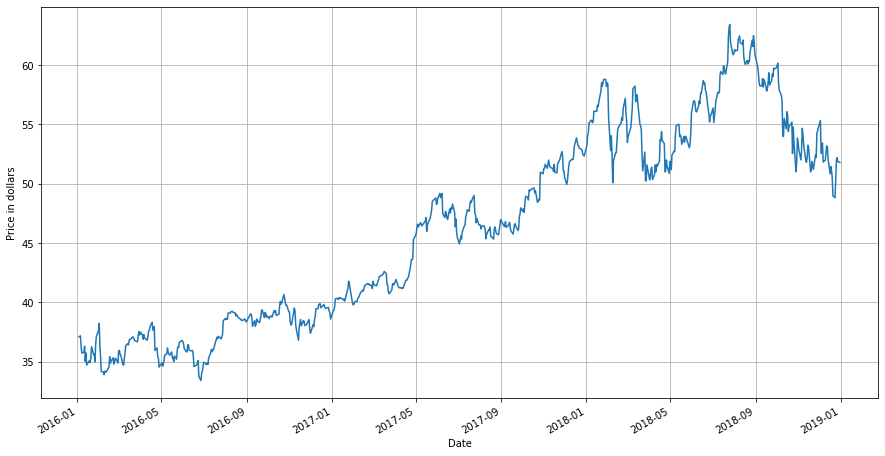

In [12]:
goog['Close'].plot(figsize = (15, 8))
plt.grid()
plt.ylabel("Price in dollars")
plt.show()

In [15]:
# create 50 days simple moving average column
goog['50_SMA'] = goog['Close'].rolling(window = 50, min_periods = 1).mean()
# create 50 days simple moving average column
goog['200_SMA'] = goog['Close'].rolling(window = 200, min_periods = 1).mean()
# display first few rows
goog

,Open,High,Low,Close,Volume,Dividends,Stock Splits,50_SMA,200_SMA
Date,,,,,,,,,
2016-01-04,37.150002,37.202999,36.562901,37.091999,65456000,0,0,37.091999,37.091999
2016-01-05,37.322498,37.599998,36.931999,37.129002,39014000,0,0,37.110500,37.110500
2016-01-06,36.500000,37.359001,36.445999,37.181000,38940000,0,0,37.134000,37.134000
2016-01-07,36.515499,36.924999,35.952999,36.319500,59274000,0,0,36.930375,36.930375
2016-01-08,36.572498,36.661499,35.650002,35.723499,49018000,0,0,36.689000,36.689000
...,...,...,...,...,...,...,...,...,...
2018-12-24,48.695000,50.176998,48.505501,48.811001,31806000,0,0,52.913760,55.777815
2018-12-26,49.450500,52.000000,49.150002,51.973000,47466000,0,0,52.843140,55.746555
2018-12-27,50.857498,52.194500,49.849998,52.194000,42196000,0,0,52.794770,55.722983


In [22]:
goog['Signal'] = 0.0
goog['Signal'] = np.where(goog['50_SMA'] > goog['200_SMA'], 1.0, 0.0)
goog['Position'] = goog['Signal'].diff()
goog

,Open,High,Low,Close,Volume,Dividends,Stock Splits,50_SMA,200_SMA,Signal,Position
Date,,,,,,,,,,,
2016-01-04,37.150002,37.202999,36.562901,37.091999,65456000,0,0,37.091999,37.091999,0.0,NaN
2016-01-05,37.322498,37.599998,36.931999,37.129002,39014000,0,0,37.110500,37.110500,0.0,0.0
2016-01-06,36.500000,37.359001,36.445999,37.181000,38940000,0,0,37.134000,37.134000,0.0,0.0
2016-01-07,36.515499,36.924999,35.952999,36.319500,59274000,0,0,36.930375,36.930375,0.0,0.0
2016-01-08,36.572498,36.661499,35.650002,35.723499,49018000,0,0,36.689000,36.689000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,48.695000,50.176998,48.505501,48.811001,31806000,0,0,52.913760,55.777815,0.0,0.0
2018-12-26,49.450500,52.000000,49.150002,51.973000,47466000,0,0,52.843140,55.746555,0.0,0.0
2018-12-27,50.857498,52.194500,49.849998,52.194000,42196000,0,0,52.794770,55.722983,0.0,0.0


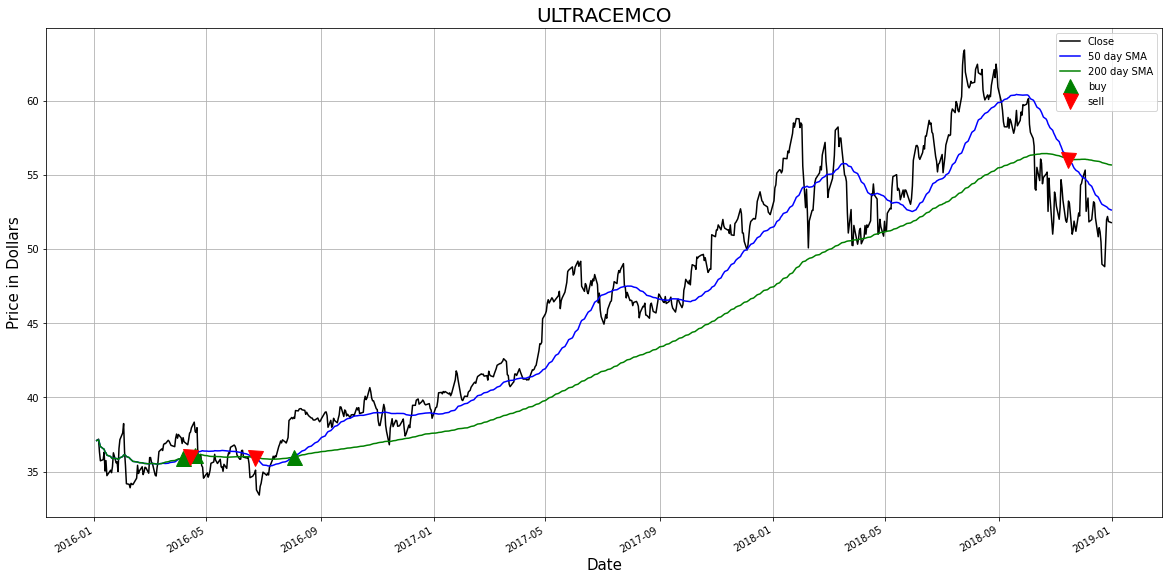

In [23]:
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
goog['Close'].plot(color = 'k', label= 'Close') 
goog['50_SMA'].plot(color = 'b',label = '50 day SMA') 
goog['200_SMA'].plot(color = 'g', label = '200 day SMA')

# plot ‘buy’ signals
plt.plot(goog[goog['Position'] == 1].index,goog['50_SMA'][goog['Position'] == 1],'^', markersize = 15, color = 'g', label = 'buy')

# plot ‘sell’ signals
plt.plot(goog[goog['Position'] == -1].index, goog['50_SMA'][goog['Position'] == -1], 'v', markersize = 15, color = 'r', label = 'sell')

plt.ylabel('Price in Dollars', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('ULTRACEMCO', fontsize = 20)
plt.legend()
plt.grid()
plt.show()